#**Business Understanding**
**Konteks**

Dalam industri pembuatan wine (anggur), menjaga kualitas produk merupakan faktor kunci dalam menentukan kepuasan pelanggan dan daya saing di pasar. Kualitas wine sangat dipengaruhi oleh berbagai karakteristik kimia dan fisik yang terbentuk selama proses fermentasi, seperti kadar alkohol, tingkat keasaman, gula residual, pH, dan kadar sulfur.
Perbedaan kecil pada variabel-variabel tersebut dapat berpengaruh besar terhadap persepsi konsumen terhadap kualitas wine, baik dari segi rasa, aroma, maupun warna. Oleh karena itu, pemahaman mendalam terhadap faktor-faktor yang memengaruhi kualitas wine menjadi sangat penting bagi produsen untuk menjaga konsistensi mutu dan meningkatkan nilai produk.

**Problem Statement**

Perusahaan menghadapi tantangan dalam menentukan tingkat kualitas wine secara akurat berdasarkan karakteristik kimia yang dimilikinya. Saat ini, penilaian kualitas sering kali bergantung pada uji sensorik oleh ahli (wine tasters), yang sifatnya subjektif dan memerlukan waktu serta biaya besar.
Untuk mengatasi hal tersebut, divisi analisis data ditugaskan untuk mengembangkan model prediksi berbasis machine learning yang dapat mengklasifikasikan tingkat kualitas wine (misalnya dari kualitas 3 hingga 8) berdasarkan data hasil laboratorium.

Dengan memahami hubungan antara variabel-variabel kimia dan tingkat kualitas wine, perusahaan dapat mengidentifikasi faktor paling berpengaruh terhadap kualitas, mengoptimalkan proses fermentasi dan bahan baku, serta menjamin konsistensi mutu produk sebelum dipasarkan.

Masalah ini penting karena kualitas produk yang tidak konsisten dapat menurunkan kepercayaan konsumen dan berdampak langsung pada penurunan penjualan serta reputasi merek.

**Tujuan**

Berdasarkan konteks dan permasalahan tersebut, penelitian ini bertujuan untuk memprediksi tingkat kualitas wine berdasarkan karakteristik kimianya dengan menggunakan beberapa algoritma machine learning, seperti Support Vector Machine (SVM), XGBoost, dan Random Forest.
Selain itu, penelitian ini juga bertujuan untuk mengetahui variabel mana yang paling berpengaruh terhadap kualitas wine, sehingga perusahaan dapat fokus dalam pengendalian proses produksi dan peningkatan mutu produk secara berkelanjutan.

#**Data Understanding**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv('/content/data_training.csv')
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


#**Tahapan Data Understanding and Cleansing**

Sebelum melakukan tahapan analisis data, perlu dilakukan pemahaman dataset secara menyeluruh agar proses pengolahan data dan pemodelan dapat berjalan dengan tepat. Langkah awal ini bertujuan untuk memastikan bahwa dataset yang digunakan bebas dari kesalahan, tidak memiliki banyak data kosong, serta memiliki kualitas data yang baik untuk proses analisis prediktif.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Dataset wine terdiri dari 857 baris dan 13 kolom. Dataset ini berisi berbagai informasi mengenai karakteristik kimia dan kualitas wine. Seluruh kolom pada dataset memiliki data yang lengkap (non-null).Sebagian besar kolom bertipe float64, sedangkan kolom quality dan Id bertipe int64.

Berikut adalah variabel-variabel yang terdapat dalam dataset.

- fixed acidity: Kandungan asam tetap (misal tartaric acid)
- volatile acidity: Asam volatil (mempengaruhi aroma dan rasa asam)
- citric acid: Menambah kesegaran rasa
- residual sugar: Jumlah gula yang tersisa setelah fermentasi
- chlorides: Kandungan garam dalam wine
- free sulfur dioxide: Sulfur bebas untuk mencegah oksidasi
- total sulfur dioxide: Total kandungan sulfur dioksida
- density: Kepadatan cairan (berhubungan dengan kadar gula & alkohol)
- pH: Tingkat keasaman
- sulphates: Berkontribusi pada stabilitas dan rasa
- alcohol: Persentase alkohol dalam wine
- quality: Skor kualitas (target klasifikasi)
- Id: Nomor identifikasi sampel

Data yang digunakan dalam penelitian ini mencakup berbagai variabel yang berkaitan dengan karakteristik fisik dan kimia dari wine. Setiap baris dalam dataset merepresentasikan satu sampel wine, sementara setiap kolom menunjukkan atribut atau fitur tertentu seperti kadar alkohol, keasaman, gula residual, pH, kadar sulfur, dan lain-lain. Variabel-variabel ini memberikan wawasan penting mengenai faktor-faktor yang memengaruhi kualitas wine. Dengan memahami pola hubungan antarvariabel tersebut, dapat dikembangkan model prediksi yang mampu mengklasifikasikan tingkat kualitas wine secara akurat, sehingga membantu perusahaan dalam mengontrol mutu dan meningkatkan standar produksinya.

In [4]:
# cek banyaknya missing value pada masing-masing kolom
print(train.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Berdasarkan hasil pemeriksaan missing value, seluruh variabel pada dataset tidak memiliki data yang hilang (missing values). Dengan demikian, tidak diperlukan proses imputasi pada dataset ini. Semua variabel, baik yang bersifat kontinu maupun kategorikal, telah memiliki jumlah data lengkap sehingga dapat langsung digunakan pada tahap analisis selanjutnya.




Selanjutnya dilakukan identifikasi deskripsi serta isi unik dari setiap variabel

In [5]:
display(train.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


/tmp/ipython-input-1014381479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=train, palette='viridis')


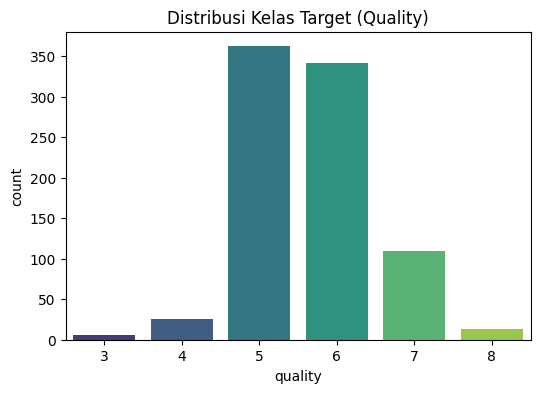

In [6]:
# Distribusi label target
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=train, palette='viridis')
plt.title("Distribusi Kelas Target (Quality)")
plt.show()

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


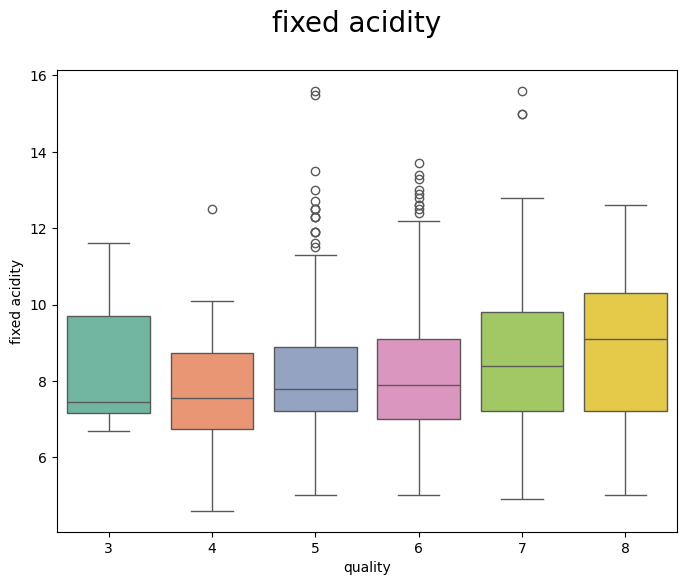

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


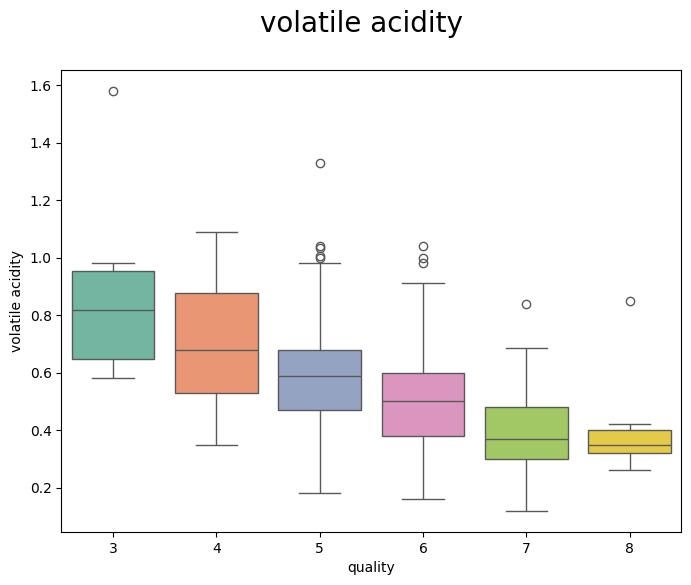

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


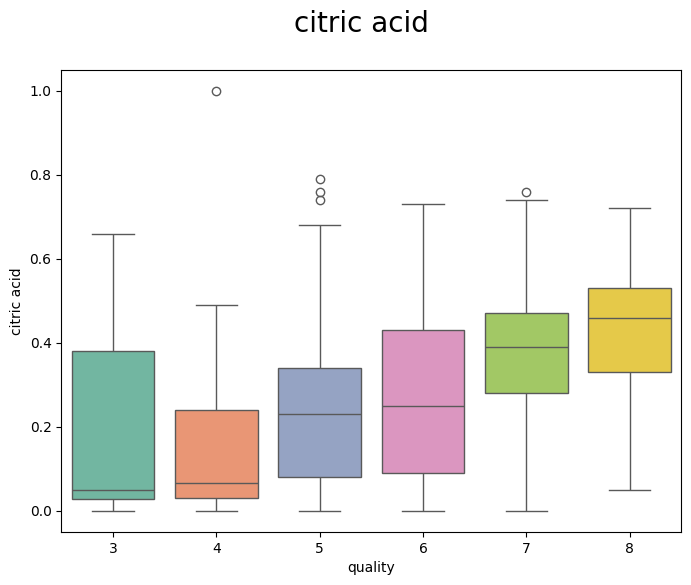

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


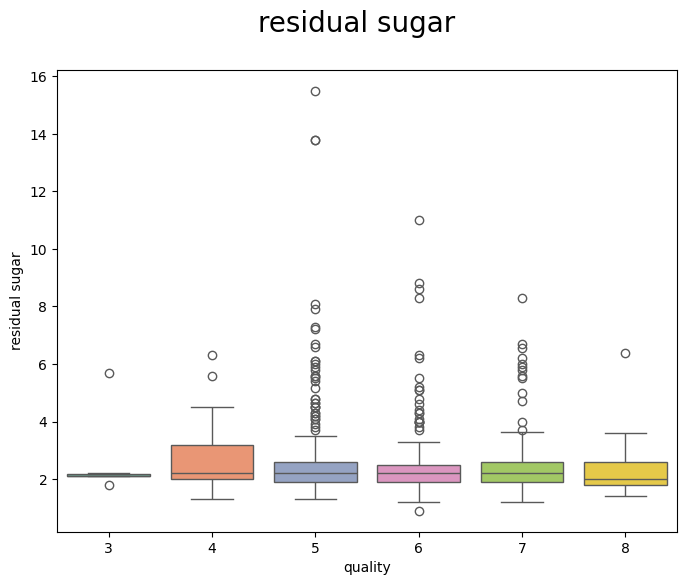

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


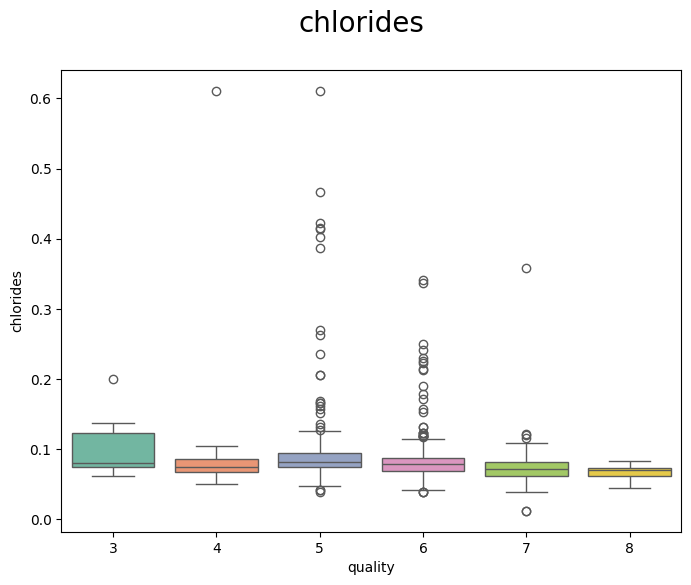

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


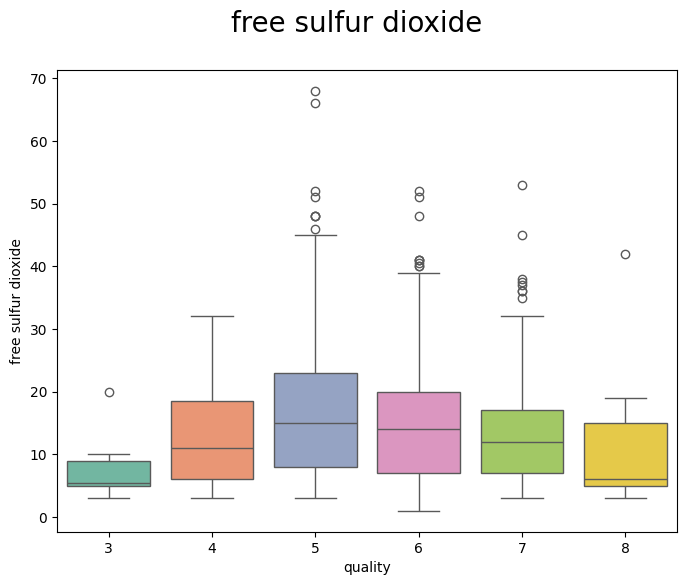

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


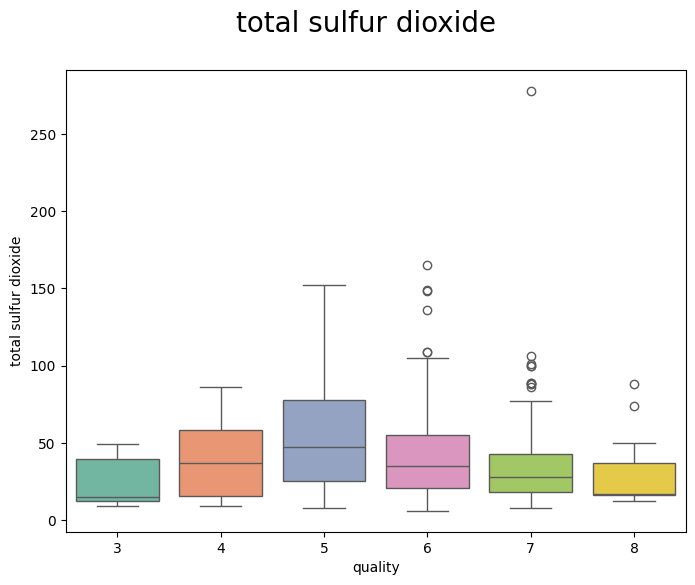

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


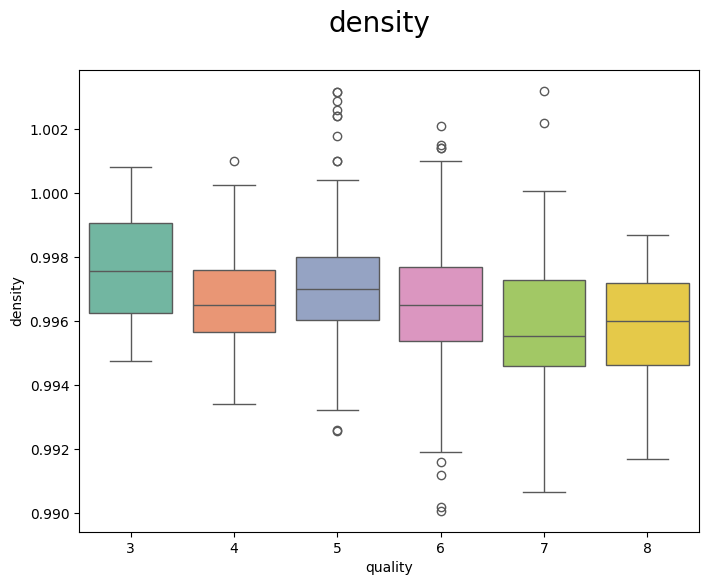

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


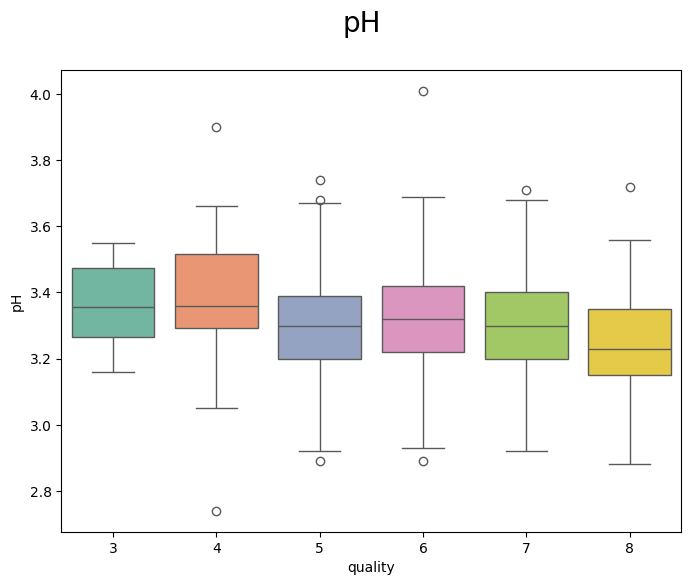

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


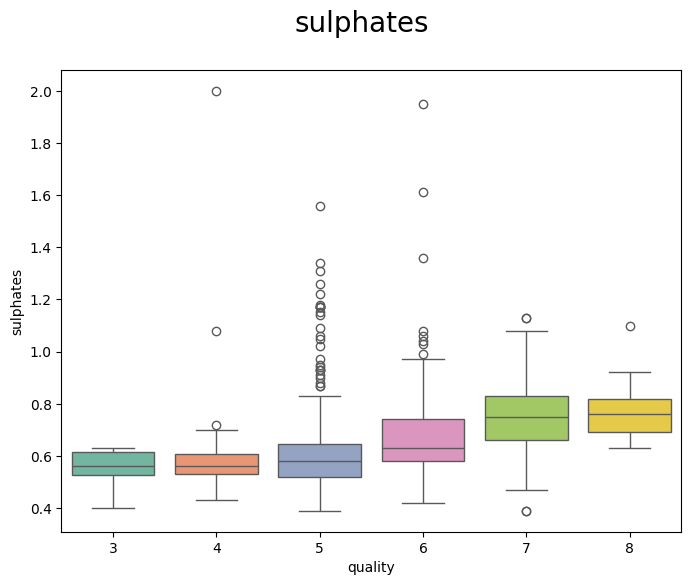

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


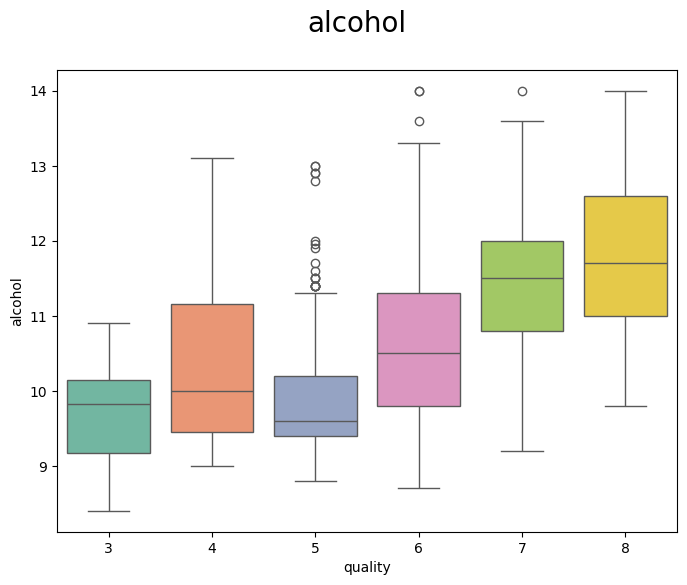

/tmp/ipython-input-2652935186.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, y=feature, x='quality', palette='Set2')


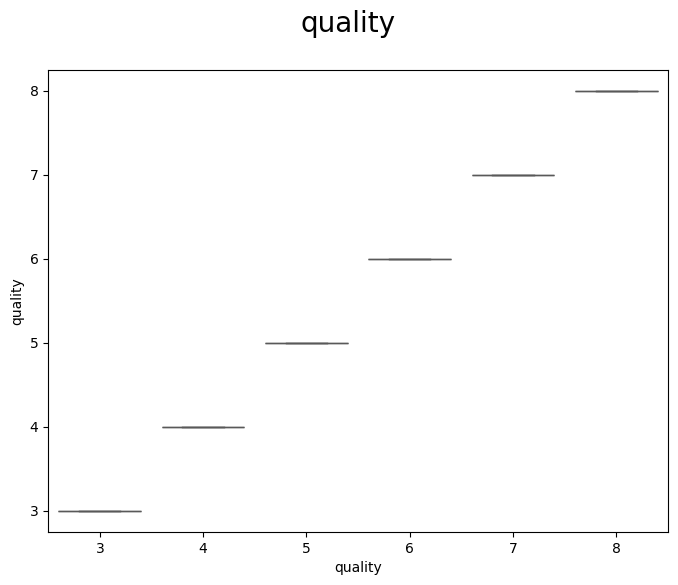

In [7]:
# Mencari fitur apa saja yang kemungkinan menjadi prediktor yang baik
import matplotlib.pyplot as plt
import seaborn as sns

# Iterasi untuk membuat box plot untuk setiap fitur numerik terhadap kolom 'Churn'
for feature in train.describe(exclude='object').columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.suptitle(feature, fontsize=20)
    sns.boxplot(data=train, y=feature, x='quality', palette='Set2')
    plt.show()

Berdasarkan boxplot tersebut, dapat dilihat bahwa ada beberapa fitur yang mungkin dapat menjadi prediktor yang baik yaitu:

1. volatile acidity
2. citric acid
3. density
4. sulphates
5. alcohol


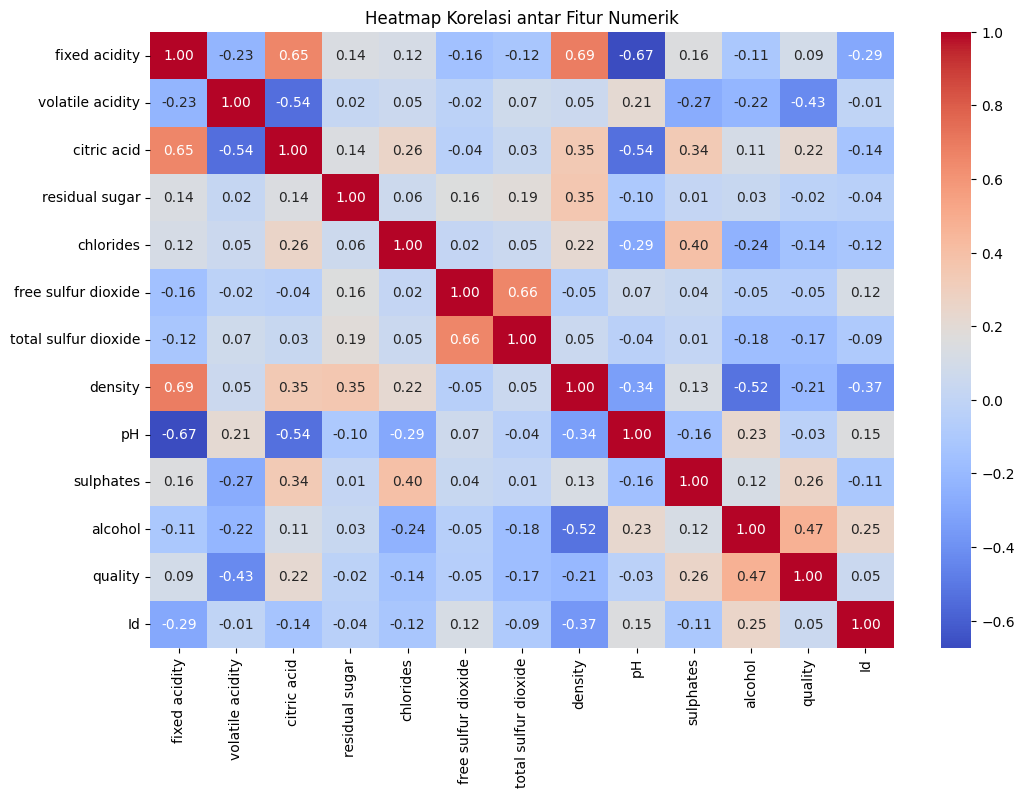

In [8]:
# Hitung matriks korelasi
correlation_matrix = train.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

Dari matriks korelasi di atas, dapat diamati beberapa hubungan yang cukup kuat antar fitur numerik pada dataset wine quality. Korelasi tertinggi positif terdapat antara variabel “free sulfur dioxide” dan “total sulfur dioxide” dengan nilai sekitar 0.66, yang menunjukkan bahwa semakin tinggi kandungan free sulfur dioxide, biasanya total sulfur dioxide juga meningkat. Selain itu, terdapat korelasi positif yang cukup tinggi antara “fixed acidity” dan “citric acid” (sekitar 0.65) serta antara “fixed acidity” dan “density” (sekitar 0.69).

Sebaliknya, terdapat korelasi negatif yang kuat antara “fixed acidity” dan “pH” (sekitar -0.67), yang berarti semakin tinggi tingkat keasaman tetap (fixed acidity), maka pH cenderung lebih rendah (lebih asam).

Jika dikaitkan dengan variabel target “quality”, fitur yang tampak memiliki korelasi paling tinggi adalah “alcohol” dengan nilai sekitar 0.47, menunjukkan bahwa kadar alkohol cenderung berhubungan positif dengan kualitas wine — semakin tinggi kadar alkohol, kualitas wine cenderung lebih baik.

Oleh karena itu, fitur “alcohol” dapat dianggap sebagai salah satu prediktor terbaik untuk memprediksi nilai quality pada dataset ini.

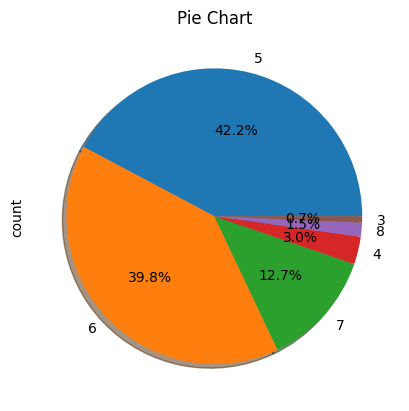

In [9]:
tipe = train['quality'].value_counts()
tipe.plot.pie(autopct='%.1f%%', shadow=True)
plt.title('Pie Chart')
plt.show()

Dari pie chart di atas dapat disimpulkan bahwa sebagian besar data memiliki nilai quality 5 dan 6, masing-masing sebesar 42.2% dan 39.8%. Sementara itu, proporsi wine dengan kualitas 7, 4, 8, dan 4 jauh lebih sedikit, yaitu masing-masing 12.7%, 3.0%, 1.5%, dan 0.7%.

# **SMOTE**

Distribusi awal data:
quality
5    362
6    341
7    109
4     26
8     13
3      6
Name: count, dtype: int64
Distribusi persentase awal:
quality
5    42.240373
6    39.789965
7    12.718786
4     3.033839
8     1.516919
3     0.700117
Name: proportion, dtype: float64


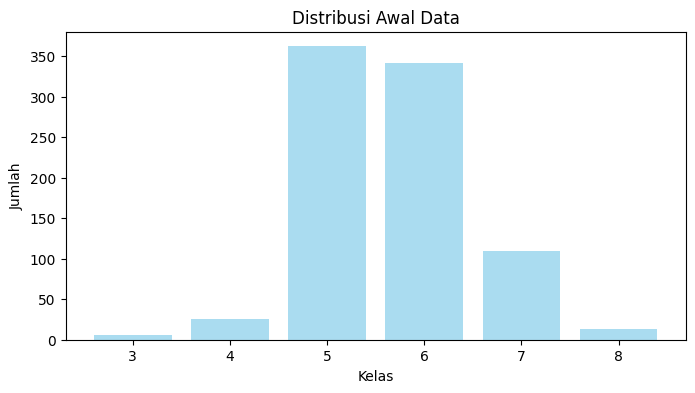

Distribusi baru setelah SMOTE:
quality
5    362
7    362
6    362
4    362
8    362
3    362
Name: count, dtype: int64
Distribusi persentase:
quality
5    16.666667
7    16.666667
6    16.666667
4    16.666667
8    16.666667
3    16.666667
Name: proportion, dtype: float64


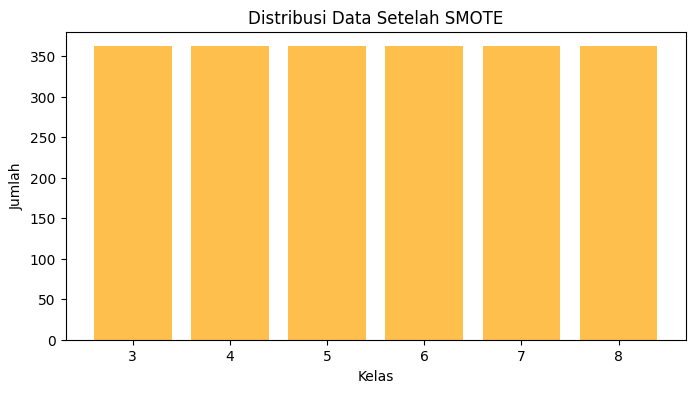

In [10]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur (X) dan target (y)
X = train.drop('quality', axis=1)
y = train['quality']

# Memeriksa distribusi awal data
original_distribution = y.value_counts()
original_distribution_percentage = y.value_counts(normalize=True) * 100

print("Distribusi awal data:")
print(original_distribution)
print("Distribusi persentase awal:")
print(original_distribution_percentage)

# Visualisasi data awal
plt.figure(figsize=(8, 4))
plt.bar(original_distribution.index, original_distribution.values, color='skyblue', alpha=0.7)
plt.title('Distribusi Awal Data')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(original_distribution.index)
plt.show()

# Menerapkan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Memeriksa distribusi baru setelah SMOTE
new_distribution = y_smote.value_counts()
new_distribution_percentage = y_smote.value_counts(normalize=True) * 100

print("Distribusi baru setelah SMOTE:")
print(new_distribution)
print("Distribusi persentase:")
print(new_distribution_percentage)

# Visualisasi data setelah SMOTE
plt.figure(figsize=(8, 4))
plt.bar(new_distribution.index, new_distribution.values, color='orange', alpha=0.7)
plt.title('Distribusi Data Setelah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(new_distribution.index)
plt.show()

**SMOTE** (Synthetic Minority Over-sampling Technique) dilakukan karena data awal memiliki distribusi kelas yang tidak seimbang (imbalanced) — sebagian besar data berada pada kelas 5 dan 6, sedangkan kelas lainnya (seperti 3, 4, 7, dan 8) sangat sedikit. Kondisi ini bisa menyebabkan model bias terhadap kelas mayoritas saat pelatihan.

Setelah dilakukan SMOTE, jumlah data di setiap kelas menjadi sama besar (seimbang) — masing-masing memiliki 362 sampel. Dengan demikian, model dapat belajar secara lebih adil dari semua kelas, meningkatkan kemampuan generalisasi dan akurasi terutama pada kelas minoritas.


Selanjutnya dilakukan droping untuk kolom 'Id' karena tidak dibutuhkan dalam proses modeling dan evaluasi.

In [11]:
# Pisahkan ID jika ada
if 'Id' in X.columns:
    X = X.drop(columns=['Id'])
    train_id = train['Id']
    train = train.drop(columns=['Id'])
else:
    train_id = pd.Series(np.arange(1, len(train)+1), name='Id')

# **Data Splitting**

Pada proses data splitting ini kita akan membagi dataset menjadi 2 bagian yaitu data untuk training dan data untuk testing. Pembagian data tersebut kita atur sebesar 80% data untuk data training dan 20% data untuk data testing berdasarkan data hasil SMOTE.

In [12]:
# Split data hasil SMOTE menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote,
    test_size=0.2,
    random_state=4
)
# Cek jumlah data latih dan uji
print(f"Jumlah data latih: {X_train.shape[0]} baris × {X_train.shape[1]} kolom")
print(f"Jumlah data uji: {X_test.shape[0]} baris × {X_test.shape[1]} kolom")

Jumlah data latih: 1737 baris × 12 kolom
Jumlah data uji: 435 baris × 12 kolom


In [13]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Modelling**

Selanjutnya kita akan memulai tahap pembuatan model machine learning. Pembuatan model ini diterapkan hyperparameter GridSearchCV. Ada 3 metode yang akan kita coba yaitu :

1. Support Vector Machine
2. XGBoost
3. Random Forest Classifier

# **SVM**

In [14]:
# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid Search dengan cross-validation 5-fold
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Parameter terbaik:", grid_svm.best_params_)

# Gunakan model terbaik untuk prediksi data testing
best_svm = grid_svm.best_estimator_
y_pred_best = best_svm.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parameter terbaik: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Hyperparameter pada SVM (Support Vector Machine) dilakukan untuk mencari kombinasi parameter terbaik yang menghasilkan performa model paling optimal.

Dalam kode ini digunakan Grid Search dengan cross-validation 5-fold, yang menguji berbagai kombinasi nilai:
- C mengontrol seberapa besar penalti terhadap kesalahan klasifikasi (regularisasi),
- gamma menentukan seberapa jauh pengaruh satu data titik terhadap lainnya (kompleksitas batas keputusan),
- kernel 'rbf' digunakan untuk menangani data non-linear.

Hasil menunjukkan parameter terbaik adalah C = 10 dan gamma = 0.1, artinya model bekerja paling baik dengan margin yang lebih ketat dan kompleksitas sedang, sehingga memberikan akurasi tertinggi pada data latih.

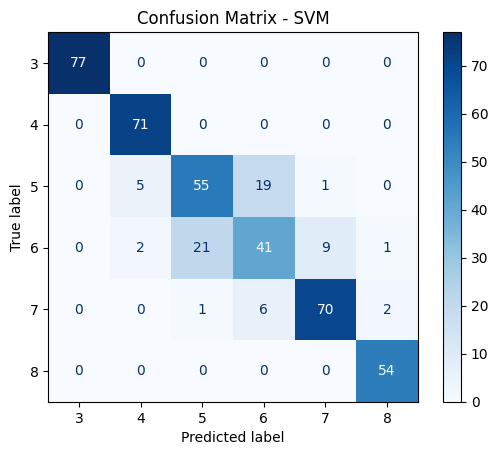

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

In [22]:
# Evaluasi hasil prediksi
print("\nClassification Report- SVM:\n", classification_report(y_test, y_pred_best))


Classification Report- SVM:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        77
           4       0.91      1.00      0.95        71
           5       0.71      0.69      0.70        80
           6       0.62      0.55      0.59        74
           7       0.88      0.89      0.88        79
           8       0.95      1.00      0.97        54

    accuracy                           0.85       435
   macro avg       0.84      0.85      0.85       435
weighted avg       0.84      0.85      0.84       435



Berdasarkan hasil classification report SVM berdasarkan parameter terbaik (C=10, gamma=0.1, kernel=‘rbf’), model SVM menunjukkan performa yang cukup baik, dengan akurasi sebesar 85%, precision 84%, recall 85%, dan f1-score 85%. Sebagian besar kelas, seperti kelas 3, 4, 7, dan 8, memiliki nilai f1-score di atas 0.9, menunjukkan kemampuan model yang sangat baik dalam mengenali kelas tersebut. Kelas 5 dan 6 memiliki performa sedikit lebih rendah, namun masih cukup stabil dengan f1-score sekitar 0.7 dan 0.59.
Klasifikasi menggunakan SVM memiliki ROC-AUC score sebesar 0.959 yang dimana termasuk klasifikasi yang baik dengan kurva ROC seperti gambar di bawah ini.

#**ROC AUC SVM**

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm_proba = svm.predict_proba(X_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba, multi_class='ovr', average='weighted')

print("ROC AUC SVM (weighted, ovr):", roc_auc_svm)

ROC AUC SVM (weighted, ovr): 0.9595793631555403


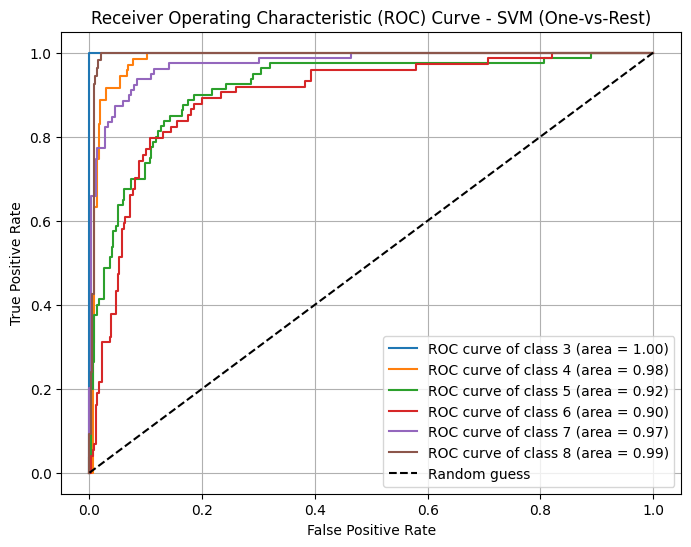

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_svm_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#**XGBOOST**

In [25]:
# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Inisialisasi model dasar
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    random_state=42,
    tree_method='hist',
    n_jobs=-1
)

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'min_child_weight': [1, 3],
    'learning_rate': [0.05, 0.1],
    'gamma': [0, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Training GridSearch
grid_search.fit(X_train, y_train_encoded)

# Hasil terbaik
print("Parameter terbaik dari Grid Search:")
print(grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Parameter terbaik dari Grid Search:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}


Penerapan hyperparameter pada XGBoost dilakukan menggunakan Grid Search untuk mencari kombinasi parameter terbaik yang menghasilkan akurasi tertinggi. Proses ini menguji berbagai nilai seperti:
- n_estimators (jumlah pohon),
- max_depth (kedalaman pohon),
- learning_rate (laju pembelajaran),
- min_child_weight, gamma, subsample, dan colsample_bytree (pengaturan kompleksitas dan sampling).

Hasil tuning menunjukkan parameter terbaik adalah colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, dan subsample=0.8, yang menghasilkan model dengan performa akurasi tertinggi dan generalisasi yang baik.

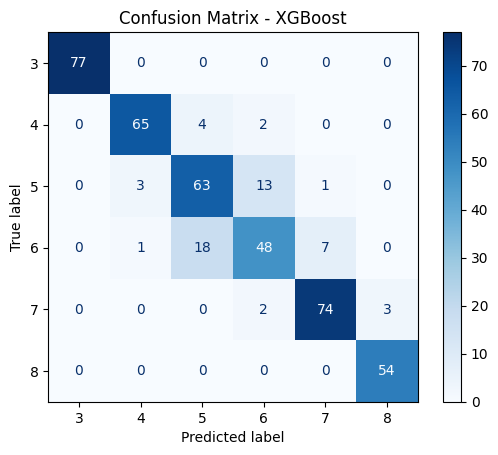

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

cm = confusion_matrix(y_test_encoded, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [27]:
# Evaluasi hasil prediksi
print("\nClassification Report - XGBoost:\n", classification_report(y_test_encoded, y_pred_xgb, target_names=[str(cls) for cls in le.classes_]))


Classification Report - XGBoost:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        77
           4       0.94      0.92      0.93        71
           5       0.74      0.79      0.76        80
           6       0.74      0.65      0.69        74
           7       0.90      0.94      0.92        79
           8       0.95      1.00      0.97        54

    accuracy                           0.88       435
   macro avg       0.88      0.88      0.88       435
weighted avg       0.87      0.88      0.87       435



Berdasarkan hasil classification report XGBoost berdasarkan parameter terbaik, model menunjukkan performa yang sangat baik dengan akurasi sebesar 88%, precision 87%, recall 88%, dan f1-score 88%. Sebagian besar kelas, seperti 3, 4, 7, dan 8, memiliki nilai f1-score di atas 0.9, menandakan kemampuan model yang sangat baik dalam mengklasifikasikan kelas tersebut. Kelas 5 dan 6 memiliki performa sedikit lebih rendah namun tetap stabil dengan f1-score sekitar 0.76 dan 0.69.

Model XGBoost juga memiliki ROC-AUC score sebesar 0.975, yang menunjukkan bahwa performa klasifikasinya sangat baik dan lebih unggul dibandingkan model SVM.

#**ROC AUC XGBoost**

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_xgb_proba = best_xgb.predict_proba(X_test)
roc_auc_xgb = roc_auc_score(y_test_encoded, y_pred_xgb_proba, multi_class='ovr', average='weighted')

print("ROC AUC XGBoost (weighted, ovr):", roc_auc_xgb)

ROC AUC XGBoost (weighted, ovr): 0.9752057311616812


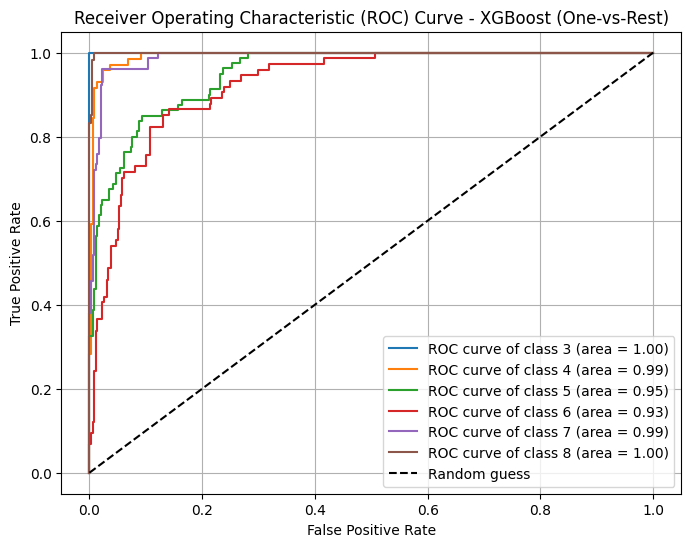

In [29]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_xgb_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#**Random Forest**

In [30]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([4, 4, 6, 6, 6, 3, 6, 6, 8, 7, 6, 4, 7, 7, 6, 8, 5, 5, 7, 5, 7, 5,
       7, 5, 7, 7, 3, 6, 6, 5, 4, 5, 6, 8, 7, 5, 8, 3, 3, 4, 4, 3, 8, 4,
       3, 3, 8, 8, 7, 4, 3, 3, 5, 8, 8, 7, 6, 7, 4, 3, 4, 8, 3, 7, 8, 4,
       4, 8, 5, 6, 3, 6, 6, 7, 8, 7, 8, 5, 8, 3, 5, 6, 7, 3, 5, 4, 8, 8,
       5, 5, 6, 7, 8, 8, 8, 7, 5, 6, 7, 7, 6, 8, 8, 5, 3, 4, 3, 5, 5, 3,
       8, 5, 6, 7, 6, 7, 3, 6, 8, 4, 5, 5, 4, 3, 5, 5, 6, 3, 8, 5, 6, 7,
       5, 7, 7, 7, 7, 5, 8, 7, 5, 3, 4, 3, 3, 6, 7, 3, 4, 3, 6, 5, 5, 3,
       4, 3, 4, 5, 5, 5, 5, 4, 3, 7, 6, 4, 6, 5, 4, 7, 6, 5, 3, 4, 3, 5,
       3, 4, 4, 7, 6, 4, 7, 6, 3, 4, 8, 5, 5, 5, 8, 7, 4, 4, 7, 5, 4, 6,
       4, 6, 7, 5, 3, 6, 3, 6, 5, 8, 3, 4, 4, 5, 6, 5, 7, 5, 4, 4, 3, 4,
       6, 6, 3, 3, 7, 4, 4, 6, 5, 5, 7, 8, 5, 4, 5, 5, 7, 8, 7, 6, 5, 7,
       4, 3, 8, 3, 5, 3, 4, 5, 4, 6, 7, 6, 4, 7, 8, 3, 6, 5, 8, 6, 7, 6,
       4, 3, 5, 4, 7, 7, 5, 5, 4, 4, 5, 8, 6, 8, 5, 7, 5, 3, 6, 5, 3, 4,
       7, 8, 8, 7, 5, 6, 6, 5, 6, 5, 3, 7, 3, 4, 5,

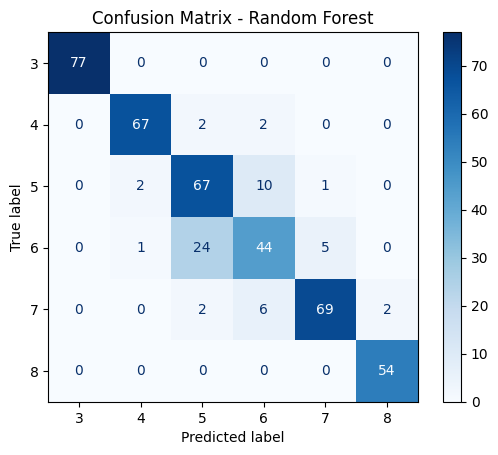

In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [33]:
# Classification Report
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))



Classification Report - Random Forest:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        77
           4       0.96      0.94      0.95        71
           5       0.71      0.84      0.77        80
           6       0.71      0.59      0.65        74
           7       0.92      0.87      0.90        79
           8       0.96      1.00      0.98        54

    accuracy                           0.87       435
   macro avg       0.88      0.87      0.87       435
weighted avg       0.87      0.87      0.87       435



Berdasarkan hasil classification report Random Forest, model menunjukkan performa yang sangat baik dengan akurasi sebesar 87%, precision 87%, recall 87%, dan f1-score 87%. Sebagian besar kelas seperti 3, 4, 7, dan 8 memiliki f1-score di atas 0.9, menandakan model mampu mengenali kelas tersebut dengan sangat baik. Kelas 5 dan 6 memiliki performa sedikit lebih rendah namun tetap stabil dengan f1-score sekitar 0.77 dan 0.65.

Model Random Forest juga memiliki ROC-AUC score sebesar 0.977, yang menunjukkan performa klasifikasi sangat baik.

#**ROC AUC Random Forest**

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_rf_proba = rf_model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba, multi_class='ovr', average='weighted')

print("ROC AUC Random Forest (weighted, ovr):", roc_auc_rf)

ROC AUC Random Forest (weighted, ovr): 0.9772933993194077


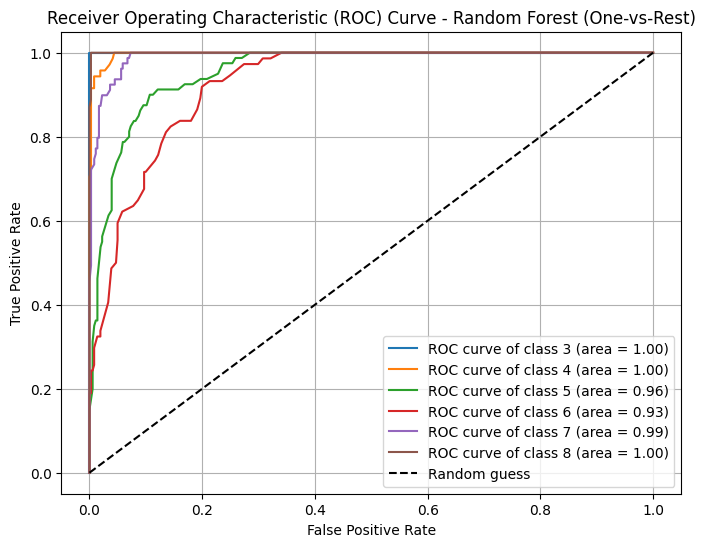

In [35]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_rf_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {np.unique(y_test)[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [36]:
acc_svm = accuracy_score(y_test, y_pred_best)
acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
acc_rf = accuracy_score(y_test, y_pred_rf)

# accuracy scores
results = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'Random Forest'],
    'Accuracy_score': [acc_svm, acc_xgb, acc_rf]
})

results['Accuracy_score'] = results['Accuracy_score'].round(2)
results = results.sort_values(by='Accuracy_score', ascending=False)

display(results)

,Model,Accuracy_score
1,XGBoost,0.88
2,Random Forest,0.87
0,SVM,0.85


/tmp/ipython-input-2223468869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy_score', data=results, palette='pastel')


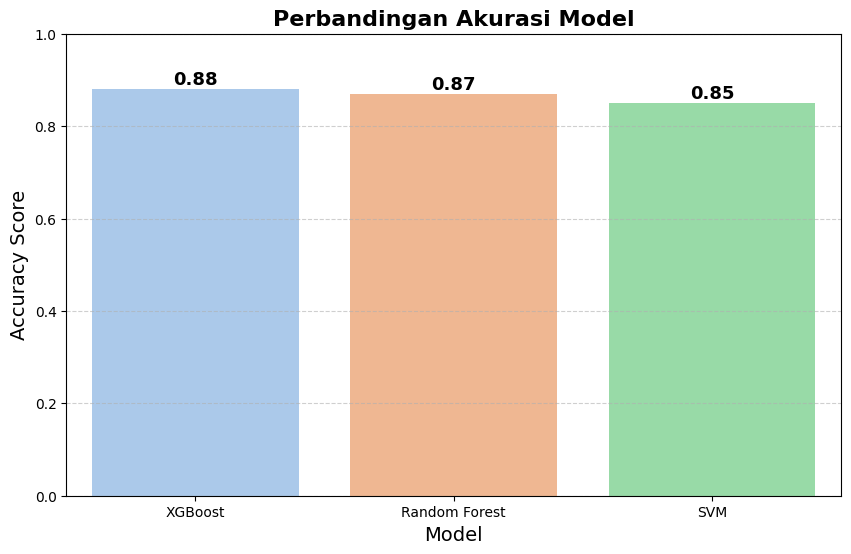

In [37]:
# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy_score', data=results, palette='pastel')

for i, v in enumerate(results['Accuracy_score']):
    ax.text(i, v + 0.01, str(round(v, 2)),
            ha='center', fontsize=13, color='black', fontweight='bold')

plt.title('Perbandingan Akurasi Model', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Dari penerapan tiga metode yaitu, SVM, XGBoost, dan Random Forest, dapat disimpulkan bahwa XGBoost merupakan model terbaik di antara ketiganya.
Metode ini memberikan akurasi dan ROC-AUC tertinggi, serta performa yang lebih stabil pada hampir semua kelas, sehingga paling optimal untuk digunakan pada data ini.

#**Data Testing**

Pada data testing Wine Quality dilakukan prediksi nilai kualitas wine menggunakan metode terbaik yang diperoleh dari data training yaitu, metode XGBoost.

In [38]:
df_test = pd.read_csv('/content/data_testing.csv')
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516
...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439


In [39]:
X_test_scaled = sc.transform(df_test)

Dilakukan scaling pada data testing.

In [40]:
y_pred_test_xgb = best_xgb.predict(X_test_scaled)

In [41]:
df_test['Prediksi dengan XGBoost'] = y_pred_test_xgb
df_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,Prediksi dengan XGBoost
0,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000,222,2
1,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,1514,2
2,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000,417,2
3,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000,754,2
4,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000,516,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.800000,1147,3
282,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.900000,296,3
283,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.100000,170,2
284,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,1439,2


Memprediksi nilai kualitas wine pada data testing dengan metode XGBoost. Selanjutnya hasil prediksi disimpan dalam bentuk CSV yang berisi 2 kolom yaitu 'Id' dan 'Quality'.

In [42]:
# Simpan hasil ke CSV
sub_xgb = pd.DataFrame({'Id': df_test['Id'], 'Quality': y_pred_test_xgb})

sub_xgb.to_csv("/content/hasilprediksi_020.csv", index=False)

print("File berhasil disimpan:")
print("Hasil Prediksi:", "/content/ hasilprediksi_020.csv")

File berhasil disimpan:
Hasil Prediksi: /content/ hasilprediksi_020.csv
